# **1. Preâmbulo**

O que veremos?

- O essencial de como utilizar um <code>Python Notebook</code>
- Como acessar o sistema de arquivos do <code>Google Drive</code>
- O uso da biblioteca <code>PIL</code> para abrir, salvar e fazer manipulações básicas de arquivos de imagem
- Como utilizar a biblioteca <code>numpy</code> para fazer operações mais poderosas e sofisticadas
- Como exibir imagens usando recursos do próprio <code>Google Colab</code> e via biblioteca <code>matplotlib</code>

Recomendações:

- Caso já não tenha feito, assista os vídeos de nivelamento de Python disponíveis no Moodle
- Se já possui noção da linguagem, mas se considere sem prática, assista, em especial, os últimos vídeos do material em questão
- Lembre-se de **salvar** de tempos em tempos seu Notebook. Ao contrário da maioria das ferramentas da plataforma da Google, o Colab necessita de salvamento de tempos em tempos

## **1.1 Importações de módulos Python (bibliotecas)**

In [ ]:
from PIL import Image # Nosso ferramental básico para manipulação de arquivos de imagem
import numpy as np # Biblioteca essencial para manipulação de matrizes (arrays) e matemática em geral
import matplotlib.pyplot as plt # Geração e plotagem de gráficos

## **1.2 Parâmetros gerais**

In [ ]:
# Altere o path abaixo para o caminho de seu Drive
path = '/content/drive/MyDrive/2023 1/PDI/Notebooks-aulas/Primeiros Passos/'
arq = 'praia.png'

# **2. Primeiros passos da manipulação de imagens**

## **2.1 Abrindo, visualizando e obtendo informaçõs básicas de uma imagem**

In [ ]:
# Abrir e exibir uma imagem
img = Image.open(path + arq)

# Exibe algumas informações básicas
print('Largura:', img.width, 'Altura:', img.height, 'Modo:', img.mode)

Largura: 270 Altura: 270 Modo: RGB


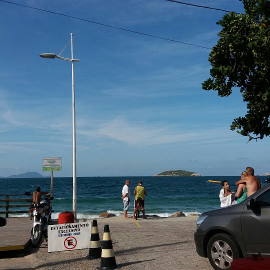

In [ ]:
# Se você estiver rodando o código em um Notebook local à sua máquina ou em um arquivo .py,
# descomente a linha abaixo
# img.show()

# No Google Colab, basta usar:
display(img)

## **2.2 Manipulação global da imagem utilizando a própria biblioteca <code>PIL</code>**

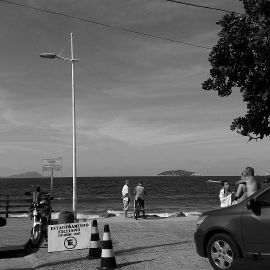

In [ ]:
# Conversão para tons de cinza
img2 = img.convert('L')
display(img2)

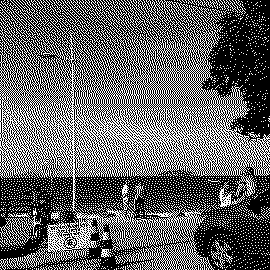

In [ ]:
# Conversão para binária
img3 = img.convert('1')
display(img3)

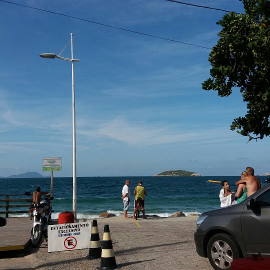

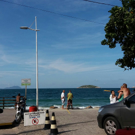

In [ ]:
# Redimensionamento
novaAltura = img.height // 2
novaLargura = img.width // 2

img4 = img.resize((novaLargura, novaAltura))
display(img)
display(img4)

In [ ]:
# Salvando os arquivos
img2.save(path + 'praiaCinza.png')
img3.save(path + 'praiaBin.png')
img4.save(path + 'praiaPeq.png')

## **2.3 Manipulação detalhada da imagem utilizando a biblioteca <code>PIL</code>**

### **A. Abordagem 1: utilizar uma imagem vazia como ponto de partida**

- Criar um objeto PIL vazio
- Percorrer o objeto, pixel por pixel, salvando no mesmo a alteração feita na imagem original, sobre o pixel correspondente

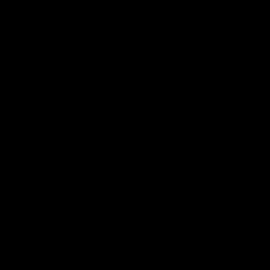

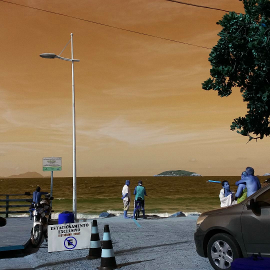

In [ ]:
# Imagem vazia
imgResult = Image.new('RGB', (img.width, img.height))
display(imgResult)

# Percurso pixel a pixel
for x in range(0, img.width):
  for y in range(0, img.height):
    # Obtém os valores de cada canal RGB na posição (x,y) da imagem original
    r,g,b = img.getpixel((x,y))

    # Manipulação básica: alterar a ordem dos canais
    novaCor = (b, g, r)

    # Salva resultado na imagem de destino, na mesma posição
    imgResult.putpixel((x,y), novaCor)

# Exibe resultado
display(imgResult)

### **B. Abordagem 2: utilizar uma cópia da imagem original como ponto de partida**

- Criar uma cópia do objeto PIL original
- Percorrer o objeto, pixel por pixel, salvando na própria cópia o resultado obtido do processamento de pixels dela mesma

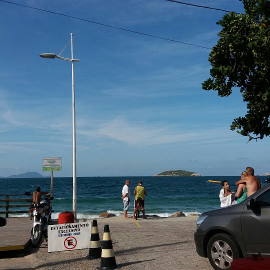

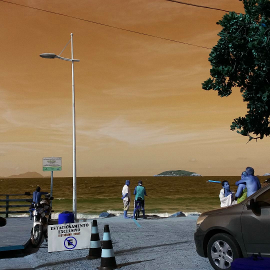

In [ ]:
# Cria uma cópia
imgResult = img.copy()
display(imgResult)

# Deste ponto em diante, não utilizaremos mais a imagem original

# Percurso pixel a pixel
for x in range(0, imgResult.width):
  for y in range(0, imgResult.height):
    # Obtém os valores de cada canal RGB na posição (x,y) da imagem original
    r,g,b = imgResult.getpixel((x,y))

    # Manipulação básica: alterar a ordem dos canais
    novaCor = (b, g, r)

    # Salva resultado na imagem de destino, na mesma posição
    imgResult.putpixel((x,y), novaCor)

# Exibe resultado
display(imgResult)

## **2.4 Manipulação da imagem utilizando a biblioteca <code>numpy</code>**

In [ ]:
# Extração do array de dados da imagem
arr = np.asarray(img).copy()

# A função np.asarray pode retornar um array somente leitura
# A solução mais robusta, portanto, é produzir uma cópia do mesmo, para que se possa alterar

# Informações básicas do array:
print('Formato do array:', arr.shape)
print('Tipo básico dos dados do array:', arr.dtype)

Formato do array: (270, 270, 3)
Tipo básico dos dados do array: uint8


#### **Atenção aqui:**

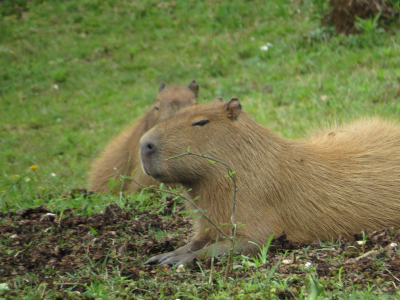

In [ ]:
imgCap = Image.open(path + 'capivara.png')
display(imgCap)

In [ ]:
arrCap = np.asarray(imgCap).copy()
print('Tamanho da imagem PIL:', imgCap.size)
print('L x A:', imgCap.width, imgCap.height)
print('Formato do array:', arrCap.shape)

Tamanho da imagem PIL: (400, 300)
L x A: 400 300
Formato do array: (300, 400, 3)


**Explicação:**

- Quando utilizamos a lógica da **imagem**, pensamos em termos de coordenadas, como na geometria analítica, isto é, em termos de $x$ e $y$. Assim, o eixo $x$ está associado à largura da imagem, enquanto o eixo $y$ está associado à altura da imagem. Daí o tamanho da imagem ser `largura x altura`.

- Quando utilizamos a lógica matricial, isto é, do **array**, pensamos em termos de linhas e colunas. Então a primeira dimensão do array é o número de linhas da matriz (associada à altura) e a segunda dimensão é o número de colunas da matriz (associada à largura).

- Esteja atento(a) à esse detalhe quando for montar *loops* para manipular uma imagem, para que os resultados não sejam aplicados sobre as dimensões trocadas da imagem.

- Observe se você está manipulando um objeto de imagem (`PIL`, por exemplo) ou um objeto de matriz (`numpy`, por exemplo).

In [ ]:
# Inversão da ordem dos canais da imagem, usando numpy
tmp = arr[:,:,2].copy() # Cria uma cópia do canal B original
arr[:,:,2] = arr[:,:,0].copy() # Copia dados do canal R para as posições do canal B
arr[:,:,0] = tmp # Atribui a cópia do canal B original para as posições do canal R

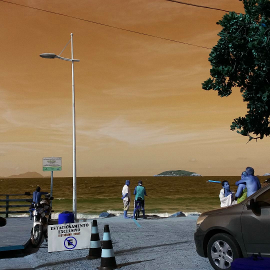

In [ ]:
# Produz um objeto PIL a partir do array
imgResult = Image.fromarray(arr)
display(imgResult)

**Observações importantes**

- A ordem dos canais RGB de uma imagem PIL e da terceira dimensão ("eixo $z$") do `array numpy` é a mesma.

- Algumas bibliotecas de manipulação de imagens, no entanto, podem trazer os canais de cor em ordem diferente daquela padrão. Por exemplo, na `opencv`, a ordem *default* dos canais é BGR, embora seja possível trabalhar com a ordem RGB também. Esteja atento(a) a este detalhe. Consulte sempre as documentações.

- Apesar de, neste exemplo inicial, não parecer haver muita vantagem no uso da abordagem via biblioteca `numpy`, na grande maioria das situações haverá ganho em trabalhar com esta abordagem, tanto em desempenho computacional, quanto em economia em linhas de código. Veja o exemplo a seguir:

### **2.5 Exemplo final: comparando abordagens**

- Vamos espelhar horizontalmente a imagem, usando a manipulação de pixels via biblioteca `PIL` e via `array numpy`

- Mais detalhes desta operação serão vistos no capítulo sobre transformações geométricas

- Para este momento, basta entender que a operação consiste em, progressivamente, trocar os dados da primeira com a última coluna, depois da segunda com a penúltima e assim sucessivamente até o meio da imagem

- Utilizaremos a imagem da capivara e faremos todo o processo "do zero", sem aproveitar código anterior

- Mediremos o tempo de execução de cada solução de forma simples, isto é, tempo corrido (e não tempo de CPU), usando a biblioteca `time`

In [ ]:
# Importação da biblioteca
from time import time

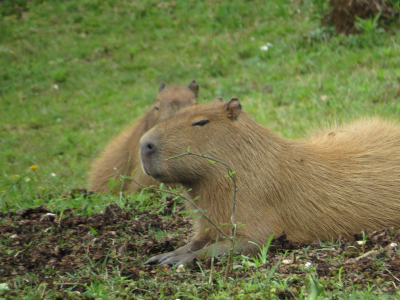

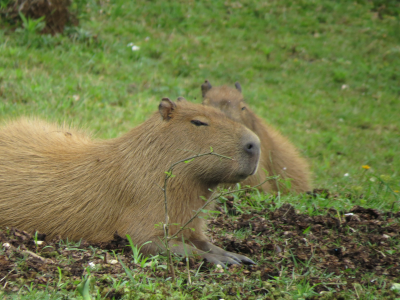

Tempo de geração: 0.8312904834747314


In [ ]:
# Salva instante de início da execução
inicio = time()

img = Image.open(path + 'capivara.png')
imgCap = img.copy() # Usaremos a abordagem da cópia, para fazer uma comparação justa
# Percorreremos as colunas (x) até o meio (largura / 2)
for x in range(imgCap.width//2):
  # Percorreremos todas linhas (y)
  for y in range(imgCap.height):
    r1,g1,b1 = imgCap.getpixel((x,y)) # Dados da posição (x,y)
    X = imgCap.width-1-x # Calcula o índice da coluna oposta
    r2,g2,b2 = imgCap.getpixel((X,y)) # Dados da posição (X,y): y (linha) é mantido intacto

    imgCap.putpixel((x,y), (r2,g2,b2))
    imgCap.putpixel((X,y), (r1,g1,b1))

# Calcula tempo total
tempo = time() - inicio

display(img)
display(imgCap)
print('Tempo de geração:', tempo)

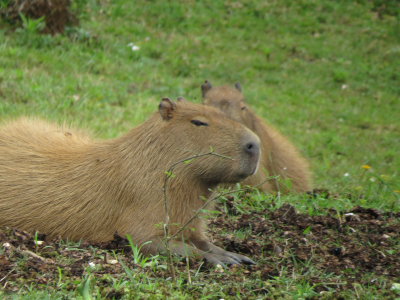

Tempo de geração: 0.17470550537109375


In [ ]:
# Salva instante de início da execução
inicio = time()

img = Image.open(path + 'capivara.png')
arrCap = np.asarray(img).copy()
# Percorreremos todas as linhas (i)
for i in range(arrCap.shape[0]):
  # Percorreremos as colunas (j) até metade (shape[1]//2)
  for j in range(arrCap.shape[1]//2):
    J = arrCap.shape[1]-1-j # Calcula posição da coluna oposta
    # Troca os dados entre as posições
    tmp = arrCap[i,j].copy()
    arrCap[i,j] = arrCap[i,J].copy()
    arrCap[i,J] = tmp

# Cria imagem
imgCap = Image.fromarray(arrCap)

# Calcula tempo total
tempo = time() - inicio

display(imgCap)
print('Tempo de geração:', tempo)

- **Atenção:** tome cuidado com o uso das atribuições e cópias nos códigos acima...

- Assista os vídeos de nivelamento de Python, se precisar reforçar seus conhecimentos em passagens por valor e referência e atribuições na linguagem.

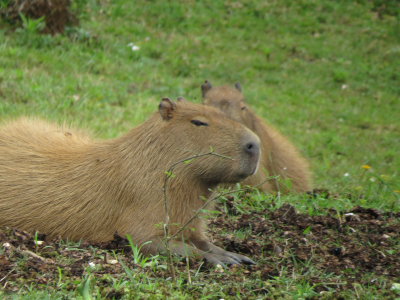

Tempo de geração: 0.022385835647583008


In [ ]:
# Salva instante de início da execução
inicio = time()

img = Image.open(path + 'capivara.png')
arrCap = np.asarray(img).copy()

# Usando a abordagem de fatiamento dos arrays numpy
arrCap = arrCap[:,::-1,:]

# Cria imagem
imgCap = Image.fromarray(arrCap)

# Calcula tempo total
tempo = time() - inicio

display(imgCap)
print('Tempo de geração:', tempo)